In [1]:
#
# In this notebook, we simulate two extremely simple biochemical systems with negative feedback architectures
#

In [2]:
%matplotlib inline
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

In [3]:
# define model equations
# indices 0 and 1 indicate inhibitor and output components, respectively
def fbmodel1(x, time, t_stim, ps):
    f = np.zeros((2,))
    s = 0.5*(np.sign(time - t_stim) + 1) + 0.1# implement step function to define input level
    f[0] = ps[0]*x[1] - ps[1]*x[0]
    f[1] = s - ps[2] * x[0]*x[1]
    return f

In [4]:
#
# Numetical integration.
# 'odeint'  uses Adams methods for non-stiff systems and backward differentiation formula methods for stiff systems.
#
params = [2, 1, 1]# kinetic parameter values
time_points = np.linspace(0, 80, 800)# define timepoints for ode solver
xinit = [1, 0.1]
xvec = integrate.odeint(fbmodel1, xinit, time_points, args=(20, params))

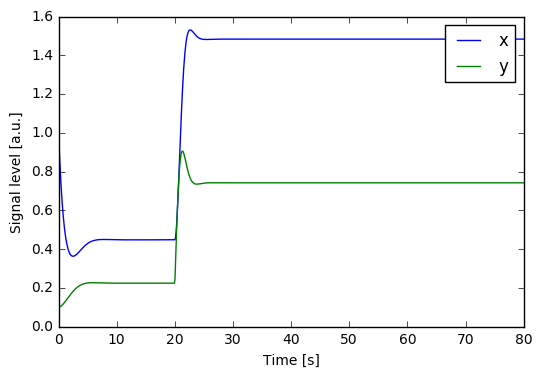

In [5]:
#
# Plot simulation result
#
plt.plot(time_points, xvec[:, 0], label='x')
plt.plot(time_points, xvec[:, 1], label='y')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Signal level [a.u.]')
plt.show()
#
# Note that the adaptation is imperfect
#

In [6]:
# define a model by introducing auto-activation of inhibitor
def fbmodel2(x, time, t_stim, ps):
    f = np.zeros((2,))
    s = 0.5*(np.sign(time - t_stim) + 1) + 0.1# implement step function to define input level
    f[0] = ps[0]*x[0]*x[1] - ps[1]*x[0]
    f[1] = s - ps[2] * x[0]*x[1]
    return f

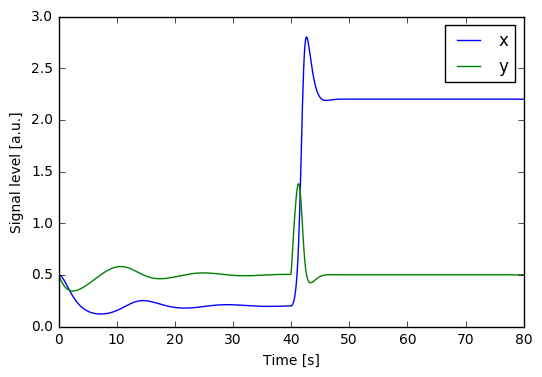

In [7]:
#
# simulate the model and visualize the result
#
xinit = [0.5, 0.5]
xvec = integrate.odeint(fbmodel2, xinit, time_points, args=(40, params))
plt.plot(time_points, xvec[:, 0], label='x')
plt.plot(time_points, xvec[:, 1], label='y')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Signal level [a.u.]')
plt.show()
#
# Note that the adaptation is perfect this time
#